# Data Analysis

In [ ]:
Aviatrix is a crash mechanics-based game. The player places a bet by launching an airplane and must land the plane before it explodes. 
The longer the plane flies, the higher the winning coefficient. If the player fails to land the plane in time and it explodes, 
they lose their bet. If the player successfully lands the plane, the winnings are calculated as the bet multiplied by the coefficient 
at the moment of landing. Based on the provided data, the following tasks need to be completed:

1 Filter and describe errors in the data.
2 Prepare a brief report with metrics that you believe are most useful for description.
3 Attempt to evaluate user engagement: devise metrics and justify their use.
4 What additional fields/events would you request to implement for more thorough research?

In [1]:
# import libraries
import pandas as pd
import numpy as np     
import warnings 
import datetime 
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None) 

# reading data from the file
df = pd.read_csv('test_data.csv')  
df.head()

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur
0,2023-03-20 15:01:13.304718058,KZT,wqsjm3ggga,platform_2,1013616,203.29,0.41,0.00,0.00
1,2023-03-13 13:40:07.304718058,TRY,enrlnd1u6y,platform_4,982714,1.88,0.09,5.79,0.29
2,2023-03-22 00:39:12.304718058,KZT,5nz03e471b,platform_1,1019784,605.22,1.21,0.00,0.00
3,2023-03-22 06:14:56.304718058,KZT,fiatnpu27d,platform_2,1020804,33.99,0.07,0.00,0.00
4,2023-03-01 14:32:41.304718058,KZT,1zx0tpf58u,platform_1,930347,18.93,0.04,0.00,0.00


In [2]:
# We have 9 columns and 99989 rows
df.shape

(99989, 9)

In [3]:
# No NaN results 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreatedAt       99989 non-null  object 
 1   Currency        99989 non-null  object 
 2   UserId          99989 non-null  object 
 3   PlatformId      99989 non-null  object 
 4   MatchId         99989 non-null  int64  
 5   stake_currency  99989 non-null  float64
 6   stake_eur       99989 non-null  float64
 7   won_currency    99989 non-null  float64
 8   won_eur         99989 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 6.9+ MB


In [4]:
# Number of unique users 23436
df['UserId'].nunique()

23436

In [5]:
# We see the average, maximum and minimum values ​​in the columns
# No negative values
df.describe()

,MatchId,stake_currency,stake_eur,won_currency,won_eur
count,9.998900e+04,99989.000000,99989.000000,99989.000000,99989.000000
mean,9.998062e+05,341.426431,1.598604,327.888584,1.491250
std,5.199881e+04,2614.545141,8.243046,5023.670546,14.491416
min,9.104570e+05,0.000000,0.000000,0.000000,0.000000
25%,9.550610e+05,9.990000,0.090000,0.000000,0.000000
50%,9.994690e+05,42.150000,0.210000,0.000000,0.000000
75%,1.045349e+06,128.420000,0.820000,37.870000,0.250000
max,1.089988e+06,150146.690000,320.050000,673841.930000,1469.580000


In [6]:
# no duplicates 
duplicate = df[df.duplicated()] 
duplicate

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur


# 1. Filter and describe errors in the data.

## 1.1 Let's check Date

In [7]:
# min date - 2023-02-25
min(df['CreatedAt'])

'2023-02-25 00:00:02.304718058'

In [8]:
# max date - 2023-04-06
max(df['CreatedAt'])

'2023-04-06 23:37:06.304718058'

<Axes: xlabel='date'>

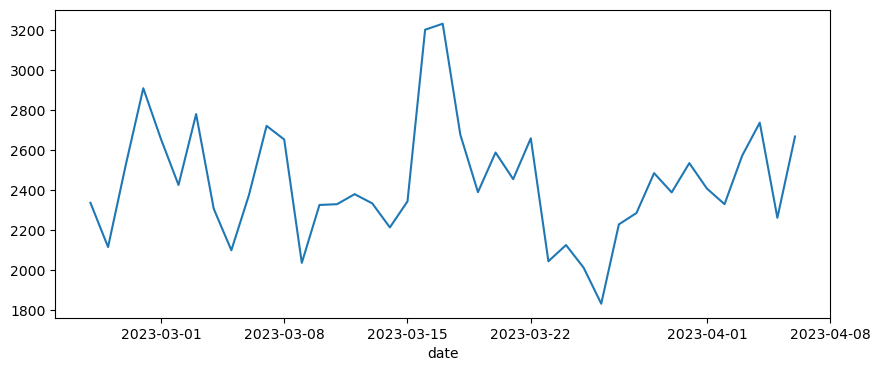

In [9]:
# We don't see days with zero bets. This is good
plt.rcParams["figure.figsize"] = (10, 4)
df['date'] = df['CreatedAt'].apply(pd.to_datetime).dt.date
df.groupby(['date'])['UserId'].count().plot()

## 1.2 Let's check the correspondence between take_currency and stake_eur, won_currency and won_eur

In [10]:
#There are 2 rows with stake_currency=0. Usually the bet value is > 0. Perhaps these are bets due to bonuses.
# We need to check the use of bonuses
df[df['stake_currency']==0]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date
5237,2023-03-10 19:18:40.304718058,AZN,0gdqrqabxe,platform_3,970695,0.0,0.0,0.00,0.0,2023-03-10
87516,2023-04-01 07:08:16.304718058,AZN,pra6xdwjfs,platform_3,1064955,0.0,0.0,0.01,0.0,2023-04-01


In [11]:
# Let's remove them
df = df[df['stake_currency']!=0]

In [12]:
# There are 260 rows with stake_eur=0. This is mistake. 
# If stake_currency>0, then stake_eur>0. And vice versa
df[df['stake_eur']==0]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date
777,2023-03-26 08:56:03.304718058,KZT,n9ker2uij0,platform_1,1038952,2.22,0.0,4.05,0.01,2023-03-26
1301,2023-03-28 10:49:49.304718058,KZT,hqljaln82w,platform_1,1048103,2.20,0.0,0.00,0.00,2023-03-28
1781,2023-02-26 12:20:18.304718058,KZT,5z9j6bp3ke,platform_3,917112,1.02,0.0,1.18,0.00,2023-02-26
2089,2023-03-28 07:35:46.304718058,TRY,mww55mwkas,platform_3,1047526,0.08,0.0,0.08,0.00,2023-03-28
2684,2023-03-20 05:49:15.304718058,KZT,t4au76z0un,platform_1,1011899,2.05,0.0,0.00,0.00,2023-03-20
...,...,...,...,...,...,...,...,...,...,...
98714,2023-03-05 11:46:57.304718058,KZT,86u9enqz6i,platform_1,947417,1.87,0.0,4.04,0.01,2023-03-05
98791,2023-03-13 13:15:58.304718058,KZT,u3q5tv1xkf,platform_2,982637,1.70,0.0,1.98,0.00,2023-03-13
99272,2023-03-14 21:28:59.304718058,TRY,vbycjxn3jv,platform_3,988571,0.05,0.0,0.14,0.01,2023-03-14
99328,2023-03-27 02:20:10.304718058,KZT,lodhtrre41,platform_1,1042141,2.08,0.0,4.50,0.01,2023-03-27


In [13]:
# Let's remove them
df = df[df['stake_eur']!=0]

In [14]:
# When won_currency=0, then won_eur equals zero
df[(df['won_currency']==0)&(df['won_eur']>0)]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date


In [15]:
# When won_eur=0, then won_currency equals zero
df[(df['won_eur']==0)&(df['won_currency']>0)]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date


## 1.3 Let's check MatchId

In [16]:
# It looks like the MatchId must be unique to the UserId
# We see 372 non unique rows. And duplicates have the same CreatedAt
df['MatchId_count'] = df.groupby(['UserId','MatchId'])['Currency'].transform('count')
df[df['MatchId_count']>1]

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date,MatchId_count
301,2023-03-05 11:43:05.304718058,AZN,lsqknq717f,platform_3,947407,0.10,0.06,0.00,0.00,2023-03-05,2
378,2023-03-10 04:01:05.304718058,KZT,zo3m4x7k6z,platform_2,967892,35.57,0.08,0.00,0.00,2023-03-10,2
523,2023-03-08 19:11:57.304718058,TRY,37krazbp6q,platform_4,961845,5.58,0.28,11.82,0.59,2023-03-08,2
991,2023-03-11 13:01:51.304718058,KZT,9zyhmsngue,platform_2,973891,58.53,0.12,335.39,0.70,2023-03-11,2
1016,2023-03-11 19:17:15.304718058,KZT,4q1nc113sq,platform_2,975003,20.14,0.04,0.00,0.00,2023-03-11,2
...,...,...,...,...,...,...,...,...,...,...,...
99445,2023-03-06 09:49:47.304718058,KZT,tvtntppy8s,platform_2,951437,41.86,0.09,0.00,0.00,2023-03-06,2
99591,2023-03-15 14:21:47.304718058,KZT,psoah4fjnr,platform_2,991668,10.20,0.02,0.00,0.00,2023-03-15,2
99637,2023-03-12 02:09:45.304718058,KZT,e14i8i2cnx,platform_1,976253,45.68,0.10,0.00,0.00,2023-03-12,2
99744,2023-03-03 16:58:15.304718058,KZT,b5uzfrxwb8,platform_2,939580,42.10,0.09,114.50,0.25,2023-03-03,2


In [17]:
# Let's remove them
df = df[df['MatchId_count']==1]

## 1.4 Let's check currency

In [18]:
# We have 4 currencies 
df.groupby(['Currency'])['UserId'].count()

Currency
AZN    10698
INR    14840
KZT    56650
TRY    17167
Name: UserId, dtype: int64

In [19]:
# We will compare currency in bet and won, with daily avg 
df['stake_eur_to_currency'] = round(df['stake_currency']/df['stake_eur'],2).fillna(0)
df['won_eur_to_currency'] = round(df['won_currency']/df['won_eur'],2).fillna(0)
df = df.replace([np.inf, -np.inf], np.nan)
df.head(100)

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date,MatchId_count,stake_eur_to_currency,won_eur_to_currency
0,2023-03-20 15:01:13.304718058,KZT,wqsjm3ggga,platform_2,1013616,203.29,0.41,0.00,0.00,2023-03-20,1,495.83,0.00
1,2023-03-13 13:40:07.304718058,TRY,enrlnd1u6y,platform_4,982714,1.88,0.09,5.79,0.29,2023-03-13,1,20.89,19.97
2,2023-03-22 00:39:12.304718058,KZT,5nz03e471b,platform_1,1019784,605.22,1.21,0.00,0.00,2023-03-22,1,500.18,0.00
3,2023-03-22 06:14:56.304718058,KZT,fiatnpu27d,platform_2,1020804,33.99,0.07,0.00,0.00,2023-03-22,1,485.57,0.00
4,2023-03-01 14:32:41.304718058,KZT,1zx0tpf58u,platform_1,930347,18.93,0.04,0.00,0.00,2023-03-01,1,473.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-03-18 03:10:05.304718058,KZT,1uudazqfcp,platform_1,1002609,474.18,0.97,0.00,0.00,2023-03-18,1,488.85,0.00
96,2023-03-20 13:07:09.304718058,INR,nib5obu402,platform_2,1013271,1.58,0.02,0.00,0.00,2023-03-20,1,79.00,0.00
97,2023-03-16 20:37:45.304718058,KZT,j40kzzjvyu,platform_1,997119,6552.78,13.35,0.00,0.00,2023-03-16,1,490.84,0.00
98,2023-04-01 17:56:26.304718058,KZT,armlddcfdm,platform_1,1066977,28.16,0.06,65.89,0.14,2023-04-01,1,469.33,470.64


In [20]:
# Due to rounding of values ​​in bets and winnings, it is difficult to check whether the conversion is correct
df[(df['Currency']=='KZT')&(df['stake_eur_to_currency']<300)].head()

,CreatedAt,Currency,UserId,PlatformId,MatchId,stake_currency,stake_eur,won_currency,won_eur,date,MatchId_count,stake_eur_to_currency,won_eur_to_currency
408,2023-04-05 09:19:54.304718058,KZT,zz3h8h44pt,platform_1,1082977,2.78,0.01,4.89,0.01,2023-04-05,1,278.0,489.0
2359,2023-03-06 11:14:48.304718058,KZT,ic9r2adgvi,platform_2,951706,2.74,0.01,5.86,0.01,2023-03-06,1,274.0,586.0
4724,2023-04-04 21:14:07.304718058,KZT,ihy8ck7goz,platform_1,1080711,2.64,0.01,0.00,0.00,2023-04-04,1,264.0,0.0
5502,2023-03-22 08:57:52.304718058,KZT,b973ccd941,platform_1,1021306,2.61,0.01,5.21,0.01,2023-03-22,1,261.0,521.0
11271,2023-03-16 11:18:11.304718058,KZT,qxev146dqa,platform_1,995448,2.57,0.01,0.00,0.00,2023-03-16,1,257.0,0.0


# 2.Prepare a brief report with metrics that you believe are most useful for description.

## 2.1 GGR 

In [21]:
# Overall GGR equals 10541.68 euro
print('GGR: ', round(sum(df['stake_eur']) - sum(df['won_eur']),2))

GGR:  10541.68


In [22]:
# platform_1 and platform_4 have negative GGR, platform_1 and platform_4 have positive GGR.
# Maximum GGR on platform_2, minimum on platform_1
df_ggr_by_platform = df.groupby(['PlatformId']).agg({'stake_eur': 'sum', 'won_eur': 'sum'}).reset_index()
df_ggr_by_platform['GGR'] = df_ggr_by_platform['stake_eur'] - df_ggr_by_platform['won_eur']
df_ggr_by_platform[['PlatformId','GGR']]

,PlatformId,GGR
0,platform_1,-1173.95
1,platform_2,8341.38
2,platform_3,3588.74
3,platform_4,-214.49


In [23]:
# Maximum GGR on currency INR, minimum on AZN
df_ggr_by_currency = df.groupby(['Currency']).agg({'stake_eur': 'sum', 'won_eur': 'sum'}).reset_index()
df_ggr_by_currency['GGR'] = df_ggr_by_currency['stake_eur'] - df_ggr_by_currency['won_eur']
df_ggr_by_currency[['Currency','GGR']]

,Currency,GGR
0,AZN,1785.51
1,INR,4461.63
2,KZT,1877.85
3,TRY,2416.69


In [24]:
# Top 10 users by GGR. We should check them
df_ggr_by_client = df.groupby(['UserId']).agg({'stake_eur': 'sum', 'won_eur': 'sum'}).reset_index()
df_ggr_by_client['GGR'] = df_ggr_by_client['stake_eur'] - df_ggr_by_client['won_eur']
df_ggr_by_client[['UserId','GGR']].sort_values('GGR').head(10)

,UserId,GGR
16319,p48moc0ld0,-1068.24
17044,q7biqfbvmy,-965.28
19662,u5kcq3c810,-655.27
18829,swpdk2jfyn,-597.21
4716,789gum5bbu,-592.36
16390,p7pt77bgsn,-589.22
17907,rixzaxdn91,-566.69
9232,e6dffafx0c,-564.21
22044,xwxvuyrak1,-489.12
14675,mkudhpoopt,-473.92


## 2.2 DAU

<Axes: xlabel='date'>

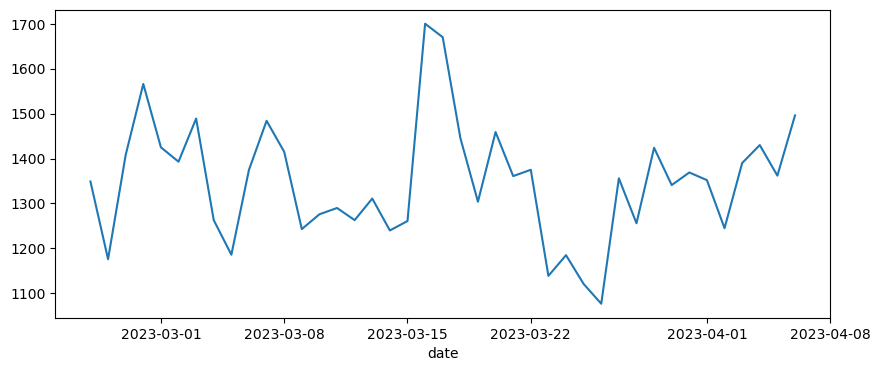

In [25]:
# Daily active users
plt.rcParams["figure.figsize"] = (10, 4)
df.groupby(['date'])['UserId'].nunique().plot()

In [26]:
# avg DAU
df_dau = df.groupby(['date'])['UserId'].nunique().reset_index()
print('DAU: ', int(df_dau['UserId'].mean()))

DAU:  1348


<Axes: xlabel='date'>

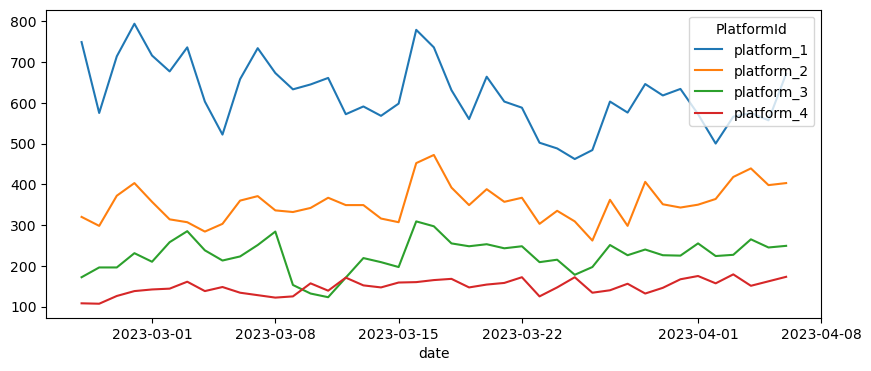

In [27]:
# platform 1 has the most DAU
df_bets_platform = df.groupby(['PlatformId','date'])['UserId'].nunique().reset_index() 
df_bets_platform = df_bets_platform.pivot(index='date', columns='PlatformId', values='UserId') 
df_bets_platform.plot()

In [28]:
# platform 1 has the most avg DAU 620, platform_4 only 148
df_dau_by_platform = df.groupby(['PlatformId','date'])['UserId'].nunique().reset_index()
df_dau_by_platform = df_dau_by_platform.groupby('PlatformId')['UserId'].mean().reset_index()
df_dau_by_platform = df_dau_by_platform.rename(columns={'UserId': 'DAU'})
df_dau_by_platform['DAU'] = (df_dau_by_platform['DAU']).astype(int)
df_dau_by_platform

,PlatformId,DAU
0,platform_1,620
1,platform_2,353
2,platform_3,225
3,platform_4,148


## 2.3 RTP

In [29]:
print('RTP: ', round(sum(df['won_eur']) / sum(df['stake_eur'])*100, 2))

RTP:  93.39


In [30]:
# platform_1 and platform_4 have very high RTP, platform_2 and platform_3 very low 
df_rtp_by_platform = df.groupby(['PlatformId']).agg({'stake_eur': 'sum', 'won_eur': 'sum'}).reset_index()
df_rtp_by_platform['RTP'] = round(df_rtp_by_platform['won_eur'] / df_rtp_by_platform['stake_eur']*100, 2)
df_rtp_by_platform[['PlatformId','RTP']]

,PlatformId,RTP
0,platform_1,103.48
1,platform_2,86.92
2,platform_3,89.75
3,platform_4,100.80


In [31]:
# Top 10 users by RTP. We should check them
df_rtp_by_client = df.groupby(['UserId']).agg({'stake_eur': 'sum', 'won_eur': 'sum'}).reset_index()
df_rtp_by_client['RTP'] = round(df_rtp_by_client['won_eur'] / df_rtp_by_client['stake_eur']*100, 2)
df_rtp_by_client[['UserId','RTP']].sort_values('RTP').tail(10)

,UserId,RTP
5520,8h3h2ennap,2548.72
12930,juyw2gyh9j,2700.00
11637,hyum7qqi3z,2753.85
7018,arc03xt0zx,3194.12
5178,7x250ns18d,3263.16
7447,bep4ro4i7e,4075.00
19485,tuznp2zaze,5775.00
12669,ji7a0w8w9z,6250.00
20633,vodakyaji1,10366.67
4807,7d932s55ko,13385.71


## 3. Attempt to evaluate user engagement: devise metrics and justify their use.

## 3.1 Lifetime

In [32]:
# On average, users use the product for 6 days (It is better to count from the date of registration)
# The longer the user interacts with the platform, the more bets he places
df_lt = df.groupby(['UserId']).agg(date_min=('date', 'min'),date_max=('date', 'max')).reset_index()
df_lt['days'] = (pd.to_datetime(df_lt['date_max']) - pd.to_datetime(df_lt['date_min'])) 
df_lt['days'].mean()

Timedelta('5 days 10:57:24.844853413')

In [33]:
# On average, users on platform_3 are the least (5 days)
# The more bets the user places, the more we earn
df_lt_by_platform = df.groupby(['UserId', 'PlatformId']).agg(date_min=('date', 'min'),date_max=('date', 'max')).reset_index()
df_lt_by_platform['days'] = (pd.to_datetime(df_lt_by_platform['date_max']) - pd.to_datetime(df_lt_by_platform['date_min'])) 
df_lt_by_platform.groupby(['PlatformId'])['days'].mean()

PlatformId
platform_1   5 days 21:21:40.970873786
platform_2   5 days 04:47:04.577987846
platform_3   4 days 15:25:38.054474708
platform_4   5 days 09:22:39.870024370
Name: days, dtype: timedelta64[ns]

## 3.2 Bets

In [34]:
# During the entire time of interaction with the product, on average, users place 4.3 bets
df_bets = df.groupby(['UserId']).agg(bets=('stake_currency', 'count')).reset_index()
print('Bets: ', round((df_bets['bets']).mean(),2))

Bets:  4.25


In [35]:
# Least on platform_1 (3.6 bets)
df_bets_by_platform = df.groupby(['UserId', 'PlatformId']).agg(bets=('stake_currency', 'count')).reset_index()
df_bets_by_platform.groupby(['PlatformId'])['bets'].mean()

PlatformId
platform_1    3.605268
platform_2    4.874916
platform_3    4.843320
platform_4    4.752234
Name: bets, dtype: float64

In [36]:
# During the entire time of interaction with the product, Life time bets sum is 0.95 euro
df_bet_mean = df.groupby(['UserId']).agg(bets=('stake_eur', 'mean')).reset_index()
print('LT bets sum: ', round(df_bet_mean['bets'].mean(), 2))

LT bets sum:  0.95


In [37]:
# platform_1 has the lowest avg bet, platform_4 the highest
df_bet_mean_by_platform = df.groupby(['PlatformId','UserId']).agg(bets=('stake_eur', 'mean')).reset_index()
df_bet_mean_by_platform.groupby(['PlatformId'])['bets'].mean().reset_index()

,PlatformId,bets
0,platform_1,0.474514
1,platform_2,1.411572
2,platform_3,1.100659
3,platform_4,1.717551


 ## 4. What additional fields/events would you request to implement for more thorough research?

In [38]:
'''
- I would like to calculate retention, for this I need to know the registration date. See which platform users stay on longer. What 
    recent events distinguish between the user who continues to play and the one who leaves.
- It would also be interesting to analyze deposits and the use of bonuses. How bonuses affect user behavior. What bonuses have a positive 
    effect on the player's interest.
- Using the start and end of the session, you can look at the duration of the sessions. The longer the session, the more the user bets.
- Find out the reason for withdrawing money. Next, create favorable conditions so that the user does not want to withdraw them (bonuses, 
    transferring withdrawals to the morning)
- VIP analysis: motivation of ordinary users to switch to VIP status.
- The influence of communications on user behavior: social networks, SMS, telegrams, etc.
- Bonuses, commissions. As a result, proceed to the calculation of NGR and DTPTL.
'''

"\n- I would like to calculate retention, for this I need to know the registration date. See which platform users stay on longer. What \n    recent events distinguish between the user who continues to play and the one who leaves.\n- It would also be interesting to analyze deposits and the use of bonuses. How bonuses affect user behavior. What bonuses have a positive \n    effect on the player's interest.\n- Using the start and end of the session, you can look at the duration of the sessions. The longer the session, the more the user bets.\n- Find out the reason for withdrawing money. Next, create favorable conditions so that the user does not want to withdraw them (bonuses, \n    transferring withdrawals to the morning)\n- VIP analysis: motivation of ordinary users to switch to VIP status.\n- The influence of communications on user behavior: social networks, SMS, telegrams, etc.\n- Bonuses, commissions. As a result, proceed to the calculation of NGR and DTPTL.\n"